# Notebook to check the dataset

## Import different dataset to have a global picture

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../raw_data/train.csv')

In [3]:
df

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [6]:
! pip install scikit-image

  Using cached scikit_image-0.18.1-cp38-cp38-macosx_10_9_x86_64.whl (12.7 MB)
     |████████████████████████████████| 165 kB 1.0 MB/s eta 0:00:01
  Using cached imageio-2.9.0-py3-none-any.whl (3.3 MB)
     |████████████████████████████████| 1.6 MB 701 kB/s eta 0:00:01
  Using cached PyWavelets-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl (4.3 MB)


In [11]:
from skimage import io
import os

In [34]:
filename = os.path.abspath(os.path.join('../raw_data/train_images', '0000a68812bc7e98c42888dfb1c07da0.jpg'))
filename

'/Users/zongyizhu/code/migasar/kaggle-wagon552-shopee/raw_data/train_images/0000a68812bc7e98c42888dfb1c07da0.jpg'

In [3]:
df

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [16]:
import matplotlib.pyplot as plt

In [35]:
img = io.imread(filename)
img.shape

(1024, 1024, 3)

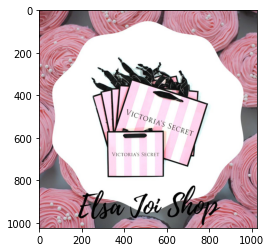

In [36]:
plt.imshow(img)

In [37]:
def trans_img(file_name):
    filename = os.path.abspath(os.path.join('../raw_data/train_images', file_name))
    return io.imread(filename)

In [38]:
img_1 = trans_img('00039780dfc94d01db8676fe789ecd05.jpg')

In [41]:
img_1.shape

(1000, 1000, 3)

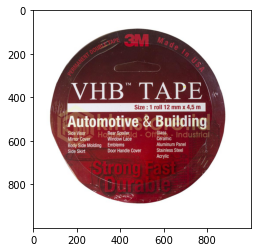

In [39]:
plt.imshow(img_1)